In [ ]:
# in AE we dont need labels
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist


In [ ]:
(xtrain , _),(xtest , _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
xtrain = xtrain.reshape(60000,28*28)
xtest = xtest.reshape(10000,28*28)

In [ ]:
print(xtrain.shape)

(60000, 784)


In [ ]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

xtrain = (xtrain - xtrain.min())/(xtrain.max() - xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max() - xtest.min())
print(xtrain.min())
print(xtrain.max())

0.0
1.0


In [ ]:
model = keras.models.Sequential()

# Provide input_shape as a tuple (784,)
model.add(keras.layers.Dense(32, activation='relu', input_shape=(784,)))

#decoder
model.add(keras.layers.Dense(784, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
output_fit=model.fit(xtrain, xtrain, epochs=10, batch_size=128,shuffle=True)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0078 - loss: 0.0847
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0097 - loss: 0.0287
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0109 - loss: 0.0198
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0113 - loss: 0.0155
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0114 - loss: 0.0131
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0116 - loss: 0.0118
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0117 - loss: 0.0110
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0116 - loss: 0.0107
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0121 - loss: 0.0104
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0119 - loss: 0.0103


In [ ]:
print(output_fit.history.keys())

dict_keys(['accuracy', 'loss'])


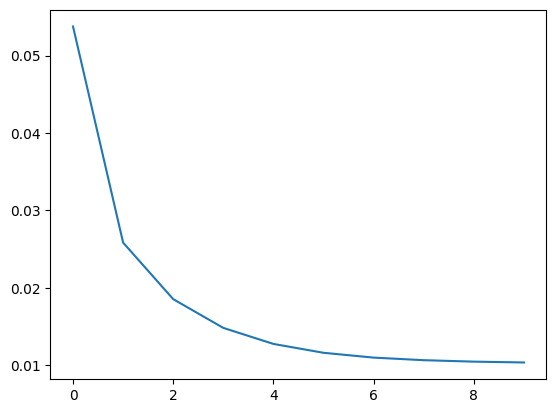

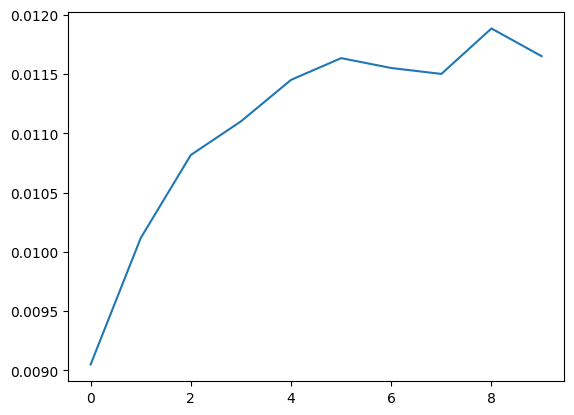

In [ ]:
plt.plot(output_fit.history['loss'])
plt.show()

plt.plot(output_fit.history['accuracy'])
plt.show()

In [ ]:
output_predict = model.predict(xtest, batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


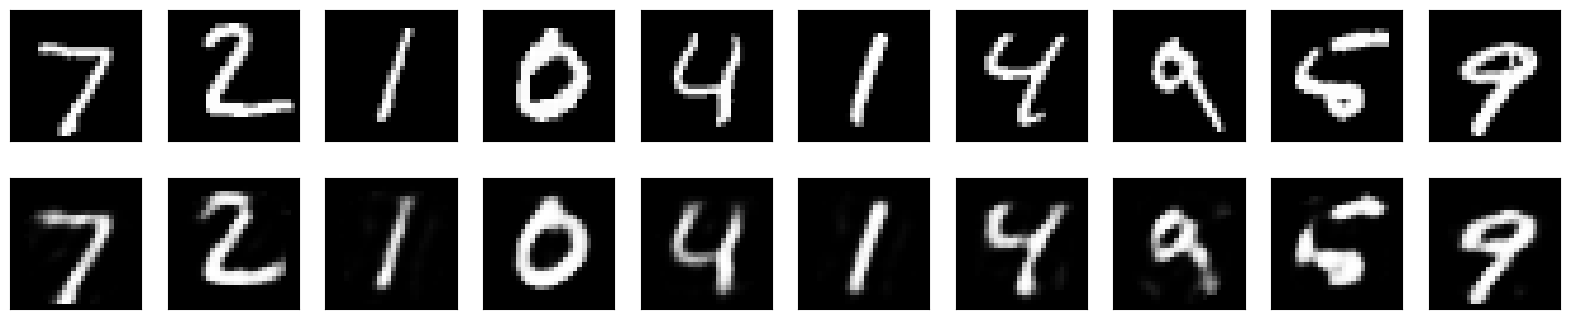

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i +1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(output_predict[i].reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.gray()
plt.show()